# Decision Tree

## 0.1 Imports 

In [12]:
!pip install opencv-python


   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.6 MB 2.9 MB/s eta 0:00:14
   ---------------------------------------- 0.3/38.6 MB 3.5 MB/s eta 0:00:11
    --------------------------------------- 0.6/38.6 MB 4.0 MB/s eta 0:00:10
   - -------------------------------------- 1.1/38.6 MB 6.3 MB/s eta 0:00:06
   - -------------------------------------- 1.5/38.6 MB 6.4 MB/s eta 0:00:06
   -- ------------------------------------- 1.9/38.6 MB 7.3 MB/s eta 0:00:06
   -- ------------------------------------- 2.1/38.6 MB 6.3 MB/s eta 0:00:06
   -- ------------------------------------- 2.1/38.6 MB 5.6 MB/s eta 0:00:07
   --- ------------------------------------ 3.0/38.6 MB 7.1 MB/s eta 0:00:06
   --- ------------------------------------ 3.3/38.6 MB 7.1 MB/s eta 0:00:05
   --- ------------------------------------ 3.6/38.6 MB 7.2 MB/s eta 0:00:05
   --- ------------------------------------ 3.7/38.6 MB 6.6 MB/s eta 0:00:06
   ---

In [15]:


# Load datasets
import cv2
import pydotplus
import matplotlib.pyplot as plt
#from six import StringIO
from sklearn import datasets as dt
from sklearn import tree as tr
from IPython.display import Image

# 1.0. Load dataset

In [6]:
iris = dt.load_iris()
X = iris.data[:, 2:]
y = iris.target

##  2.0 Model training

In [41]:
#define 
# max_depth: controle do tamanho máximo de quebras da árvore. ou seja, 
# o tamanaho máximo de crescimento da árvore ou a qtde de recortes do esp

# min_samples_leaf: O número mínimo de amostras que a folha seguinte deve
# de ter, após a divisão. 
# de fazer nova separação e gerar nós filhos 

# min_samples_split: o número mínimo de amostras que a folha vai ter para 
# um novo split

#max_leaf_nodes
#min_impurity_decrease
# max_feactures: o número máximo de atributos avaliados para a divisão de 
tree_clf = tr.DecisionTreeClassifier( min_samples_split = 50, max_depth=5, max_features= 2)
# training (fig)
tree_clf.fit(X, y)

# predict ou predict_prob
tr.export_graphviz

<function sklearn.tree._export.export_graphviz(decision_tree, out_file=None, *, max_depth=None, feature_names=None, class_names=None, label='all', filled=False, leaves_parallel=False, impurity=True, node_ids=False, proportion=False, rotate=False, rounded=False, special_characters=False, precision=3, fontname='helvetica')>

array([2])

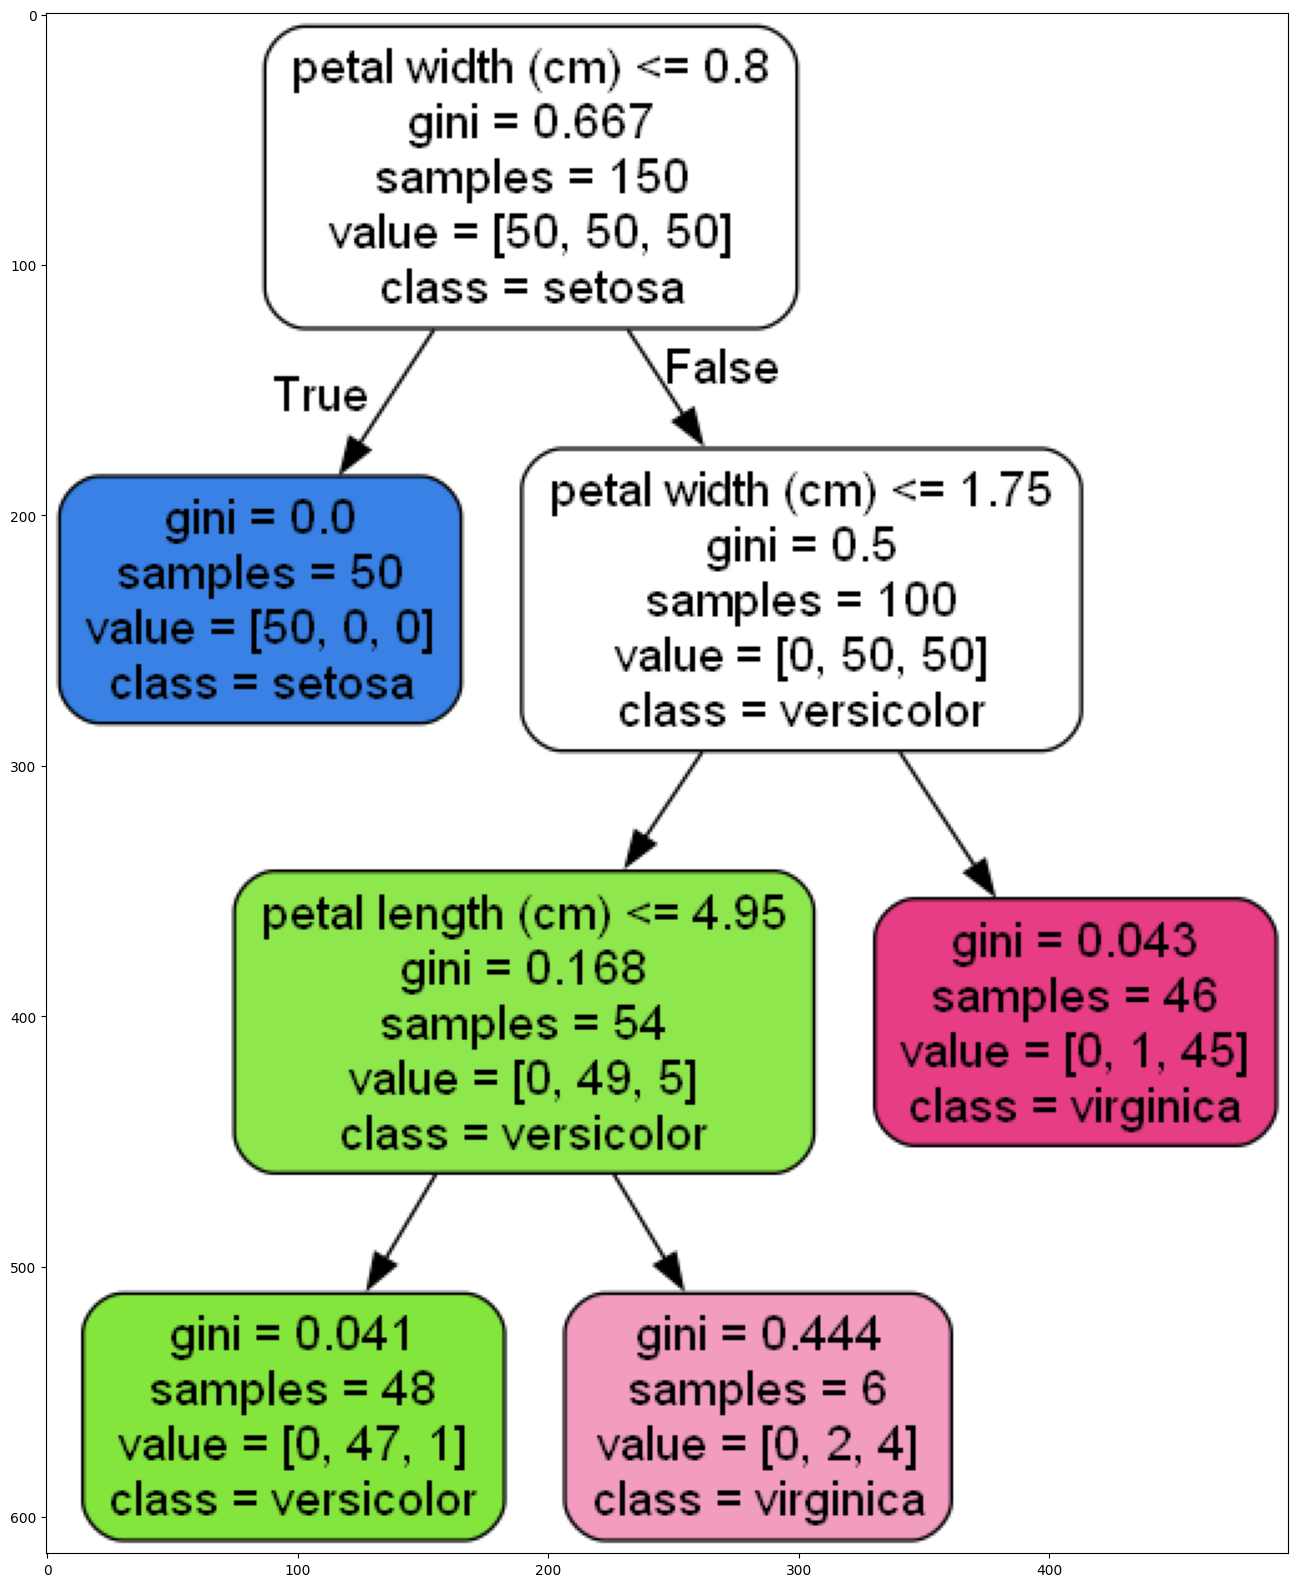

In [42]:
# Model fit

# Export draw
#dot_data = StringIO()
tr.export_graphviz(
                    tree_clf,
                    out_file='tree.dot',
                    feature_names=iris.feature_names[2:],
                    class_names=iris.target_names,
                    rounded=True,
                    filled=True
                    )




# Convert .dot to .png
!dot -Tpng tree.dot -o tree.png





# Load image on jupyter notebook
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 20))
plt.imshow(img)
# Predict
tree_clf.predict ( [[5, 1.5]] )

# AULA 44 - Curva Precision x Recall no Python

In [43]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot as plt


Model: f1=0.841 auc=0.898


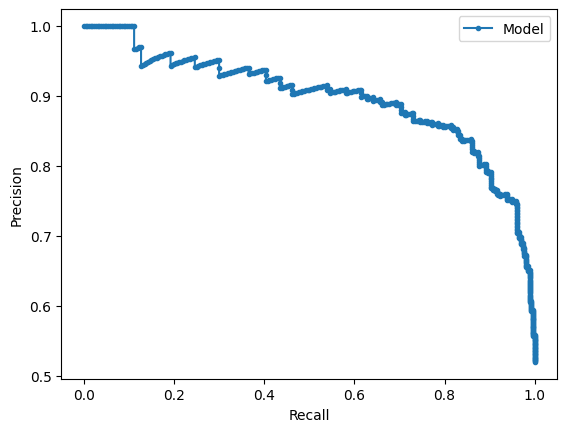

In [45]:
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
# predict probabilities
yhat_test = model.predict_proba(X_test)
yhat_test = yhat_test[:, 1]
yhat = model.predict(X_test)
# predict class values
precision, recall, thresholds = precision_recall_curve(y_test, yhat_test)
f1, auc = f1_score(y_test, yhat), auc(recall, precision)
# summarize scores
print('Model: f1=%.3f auc=%.3f' % (f1, auc))
# plot the precision-recall curves
plt.plot(recall, precision, marker='.', label='Model')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()


# Curva Threshold, Precision x Recall no Python



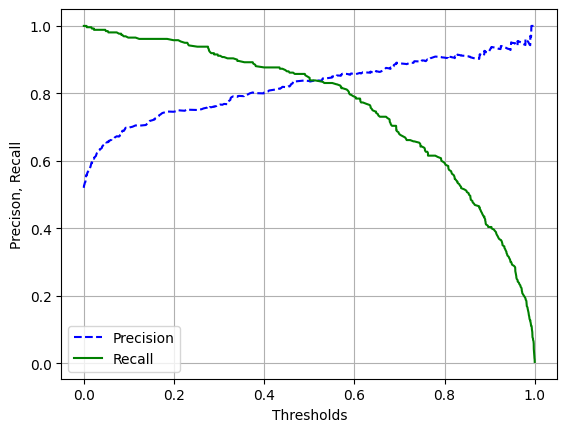

In [47]:
plt.plot( thresholds, precision[:-1], 'b--', label='Precision' );
plt.plot( thresholds, recall[:-1], 'g-', label='Recall' );
plt.xlabel( 'Thresholds' );
plt.ylabel( 'Precison, Recall' );
plt.legend()
plt.grid()

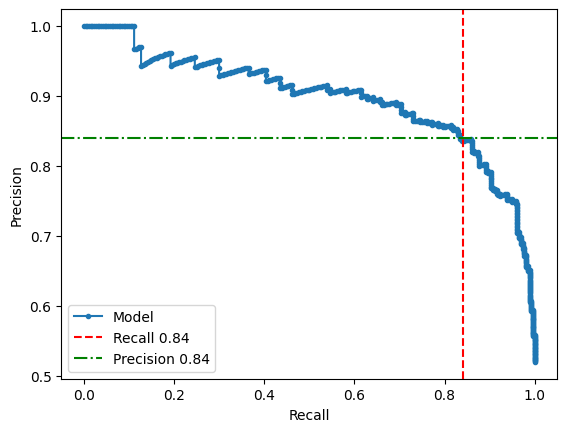

In [50]:
plt.plot(recall, precision, marker='.', label='Model')
plt.xlabel('Recall')
plt.ylabel('Precision')

# Adicionando uma linha vertical em x=0.5
plt.axvline(x=0.84, color='red', linestyle='--', label='Recall 0.84')

# Adicionando uma linha horizontal em y=0.6
plt.axhline(y=0.84, color='green', linestyle='-.', label='Precision 0.84')

plt.legend()
plt.show()

# Aula 46 - Decision Tree Regressor 

In [1]:
import cv2
from matplotlib import pyplot as plt
from sklearn import tree as tr
from sklearn import datasets as ds
from sklearn import model_selection as ms
from sklearn import metrics as mt
from six import StringIO

In [6]:
# Gerando dados sintéticos
X, y = ds.make_regression(n_features=4, random_state=0)

# Separando dados em treino e teste
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, random_state=0)

Text(0, 0.5, 'y')

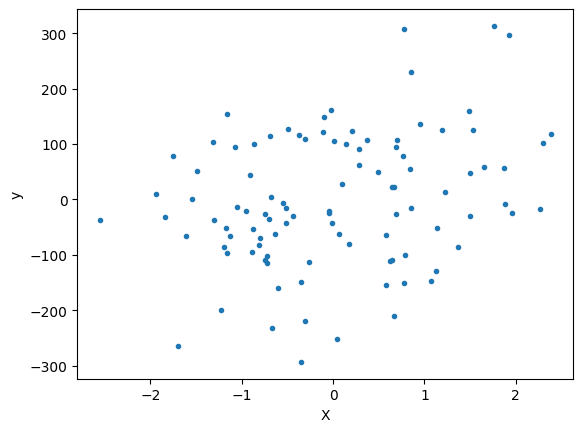

In [32]:
# Observando os dados 
plt.scatter(X[:,0], y, marker='.', label='Model')
plt.xlabel('X')
plt.ylabel('y')

# Adicionando uma linha vertical em x=0.5
#plt.axvline(x=0.84, color='red', linestyle='--', label='Recall 0.84')

# Adicionando uma linha horizontal em y=0.6
#plt.axhline(y=0.84, color='green', linestyle='-.', label='Precision 0.84')

#plt.legend()
#plt.show()

In [7]:
# Instanciando e treinando a Decision Tree Regressor
tree_reg = tr.DecisionTreeRegressor(random_state=0)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [9]:
# Realizando a predição com os dados de teste
y_pred = tree_reg.predict(X_test)

# Calculando o erro médio quadrático (MSE)
mse = mt.mean_squared_error(y_test, y_pred)
print("MSE: ", mse)

MSE:  6209.30845033826


In [11]:
# Export draw
dot_data = StringIO()
tr.export_graphviz(
                    tree_reg,
                    out_file='tree_reg.dot',
                    rounded=True,
                    filled=True
                    )

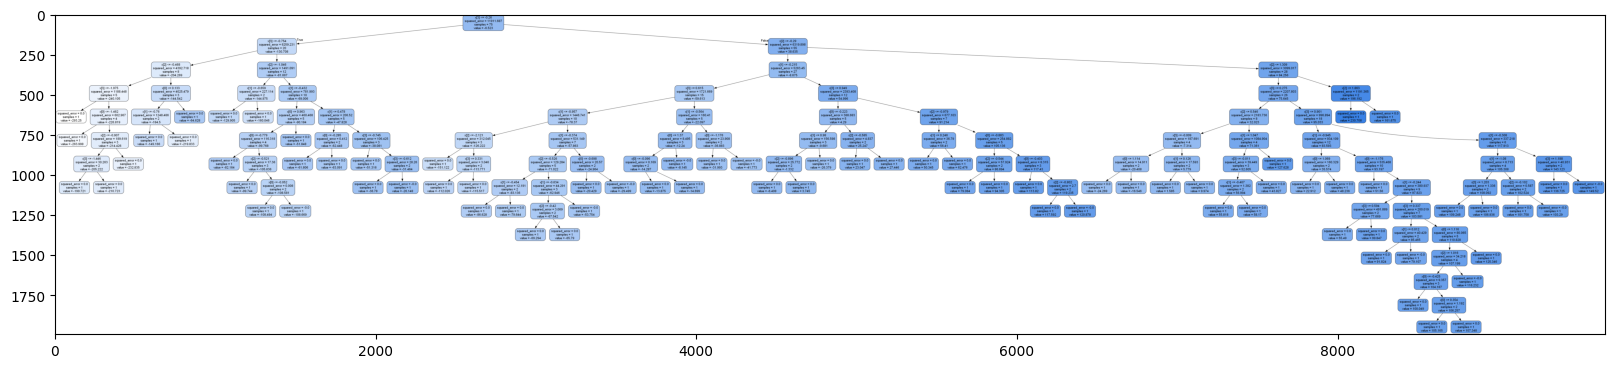

In [12]:
# Convert .dot to .png
!dot -Tpng tree_reg.dot -o tree_reg.png
# Load image on jupyter notebook
img = cv2.imread('tree_reg.png')
plt.figure(figsize = (20, 20))
plt.imshow( img )

## Treinamento do Regrerssor com Outliers 

In [33]:
import cv2
from matplotlib import pyplot as plt
from sklearn import tree as tr
from sklearn import datasets as ds
from sklearn import model_selection as ms
from sklearn import metrics as mt
from six import StringIO

In [35]:
# Gerando dados sintéticos com ruído
X, y = ds.make_regression(n_features=4, random_state=0, noise=5)
# Separando dados em treino e teste
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, random_state=0)
# Instanciando e treinando a Decision Tree Regressor
tree_reg = tr.DecisionTreeRegressor(random_state=0)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [36]:
# Realizando a predição com os dados de teste
y_pred = tree_reg.predict(X_test)
# Calculando o erro médio quadrático (MSE)
mse = mt.mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
# Export draw
dot_data = StringIO()
tr.export_graphviz(
tree_reg,
out_file='tree_reg.dot',
rounded=True,
filled=True
)

MSE:  6243.439840810896


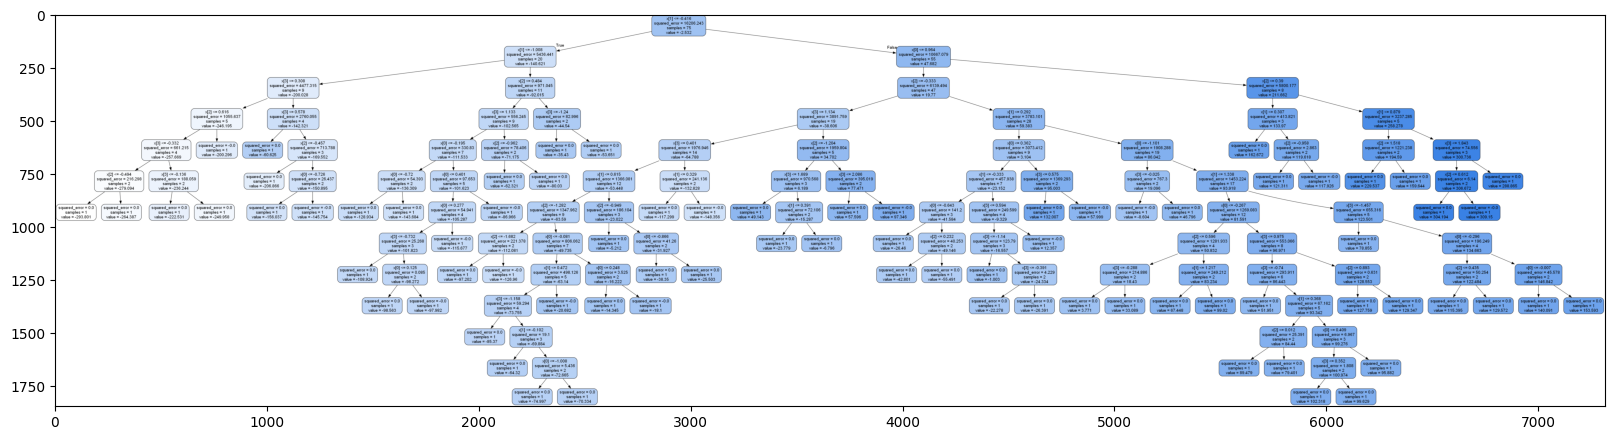

In [37]:
# Convert .dot to .png
!dot -Tpng tree_reg.dot -o tree_reg.png
# Load image on jupyter notebook
img = cv2.imread('tree_reg.png')
plt.figure(figsize = (20, 20))
plt.imshow( img )

## 1.3 Treinamento do Regressor com escalas diferentes

In [39]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn import tree as tr
from sklearn import datasets as ds
from sklearn import model_selection as ms
from sklearn import metrics as mt
from six import StringIO
# Gerando dados sintéticos com ruído
X, y = ds.make_regression(n_features=4, random_state=0, noise=5)
# Generate synthetic data with different scales
X1 = np.random.normal(0, 1, size=(100, 1))
X2 = np.random.uniform(-5, 5, size=(100, 1))
X3 = np.random.normal(10, 2, size=(100, 1))
X4 = np.random.uniform(-10, 10, size=(100, 1))
X = np.hstack((X1, X2, X3, X4))
# Separando dados em treino e teste
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, random_state=0)

In [40]:
# Instanciando e treinando a Decision Tree Regressor
tree_reg = tr.DecisionTreeRegressor(random_state=0)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [41]:
# Realizando a predição com os dados de teste
y_pred = tree_reg.predict(X_test)
# Calculando o erro médio quadrático (MSE)
mse = mt.mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
# Export draw
dot_data = StringIO()
tr.export_graphviz(
                    tree_reg,
                    out_file='tree_reg.dot',
                    rounded=True,
                    filled=True
                    )

MSE:  23953.725171206766


In [42]:
# Convert .dot to .png
!dot -Tpng tree_reg.dot -o tree_reg.png

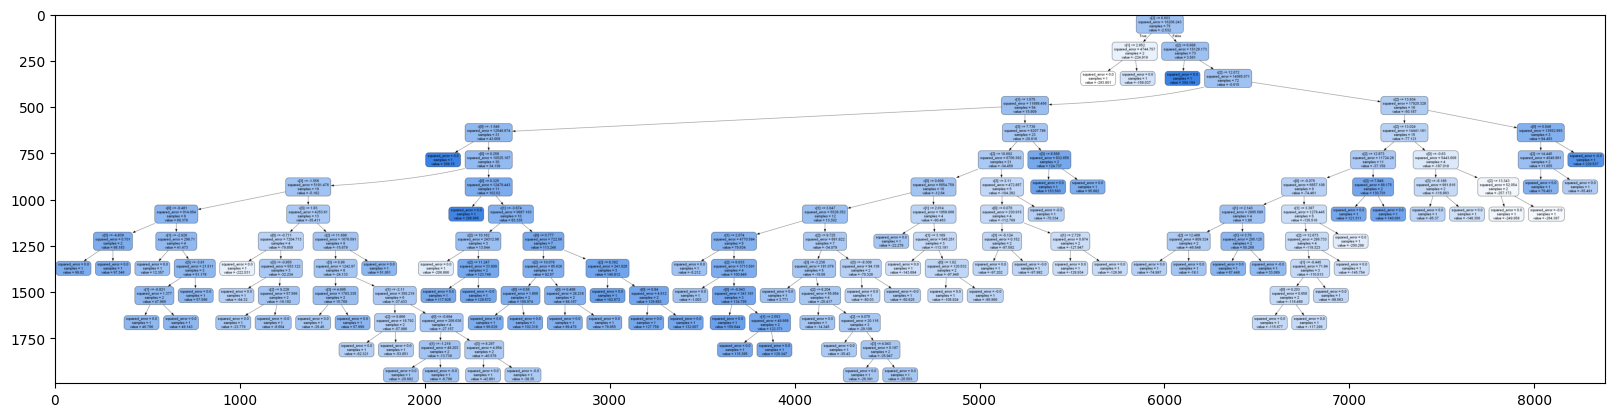

In [43]:
# Load image on jupyter notebook
img = cv2.imread('tree_reg.png')
plt.figure(figsize = (20, 20))
plt.imshow( img )

# AULA 41 - Random Forest - Prática. 

In [49]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt

In [47]:
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

In [50]:
# fit a model
model = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

## 1.2 ROC curve from RF Classifier

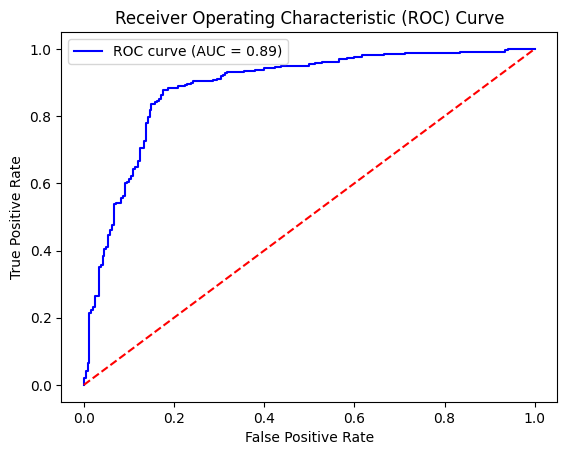

In [54]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)
# fit a model
model = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
model.fit(X_train, y_train)
y_scores = model.predict_proba(X_test)[:, 1]
# Calculate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
# Calculate AUC score
auc_score = roc_auc_score(y_test, y_scores)
# Plot ROC curve
plt.plot( fpr, tpr, color='b', label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# 1.3 Choose best threshold from ROC curve

In [55]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

from sklearn.metrics import auc
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt
from sklearn.metrics import precision_recall_curve, f1_score, auc, roc_curve, roc_auc_score, accuracy_score

In [56]:
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)


In [57]:
# fit a model
model = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
model.fit(X_train, y_train)
y_scores = model.predict_proba(X_test)[:, 1]

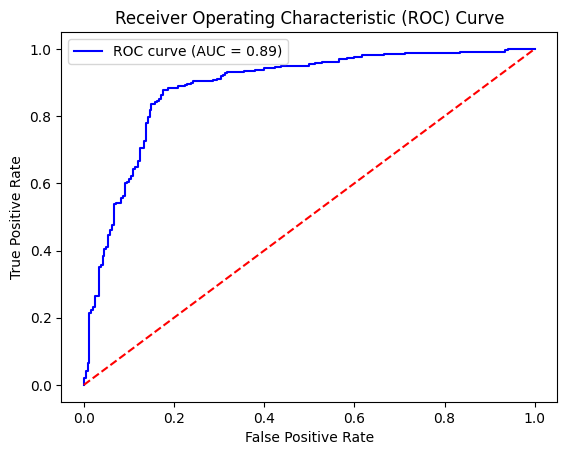

Best Threshold: 0.49157009190429823
Accuracy: 0.852


In [58]:
# Calculate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
# Calculate AUC score
auc_score = roc_auc_score(y_test, y_scores)
# Plot ROC curve
plt.plot( fpr, tpr, color='b', label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
# Find the best threshold based on ROC curve
distances = np.sqrt((1 - tpr)**2 + fpr**2)
best_threshold = thresholds[np.argmin(distances)]
print(f"Best Threshold: {best_threshold}")
# Calculate accuracy using the best threshold
y_pred = (y_scores >= best_threshold).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

## F1 - Score na prática

In [59]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, f1_score, auc, roc_curve, roc_auc_score, accuracy_score
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)
# fit a model
#model = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
yhat_test = model.predict( X_test )
# Performance
f1_score = f1_score( y_test, yhat_test )
print( "F1 Score: {}".format( f1_score ) )


F1 Score: 0.8413001912045889
